<a href="https://colab.research.google.com/github/sujithkumarmp/ai-images/blob/main/diffusers_gen.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -U diffusers transformers accelerate torch

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.4/10.4 MB 84.9 MB/s eta 0:00:00
  Attempting uninstall: transformers
    Found existing installation: transformers 5.0.0
    Uninstalling transformers-5.0.0:
      Successfully uninstalled transformers-5.0.0


In [1]:
from huggingface_hub import login
login()

Flax classes are deprecated and will be removed in Diffusers v1.0.0. We recommend migrating to PyTorch classes or pinning your version of Diffusers.
Flax classes are deprecated and will be removed in Diffusers v1.0.0. We recommend migrating to PyTorch classes or pinning your version of Diffusers.


Loading pipeline components...:   0%|          | 0/9 [00:00<?, ?it/s]

Loading weights:   0%|          | 0/197 [00:00<?, ?it/s]

Loading weights:   0%|          | 0/219 [00:00<?, ?it/s]

Loading weights:   0%|          | 0/517 [00:00<?, ?it/s]

  0%|          | 0/28 [00:00<?, ?it/s]

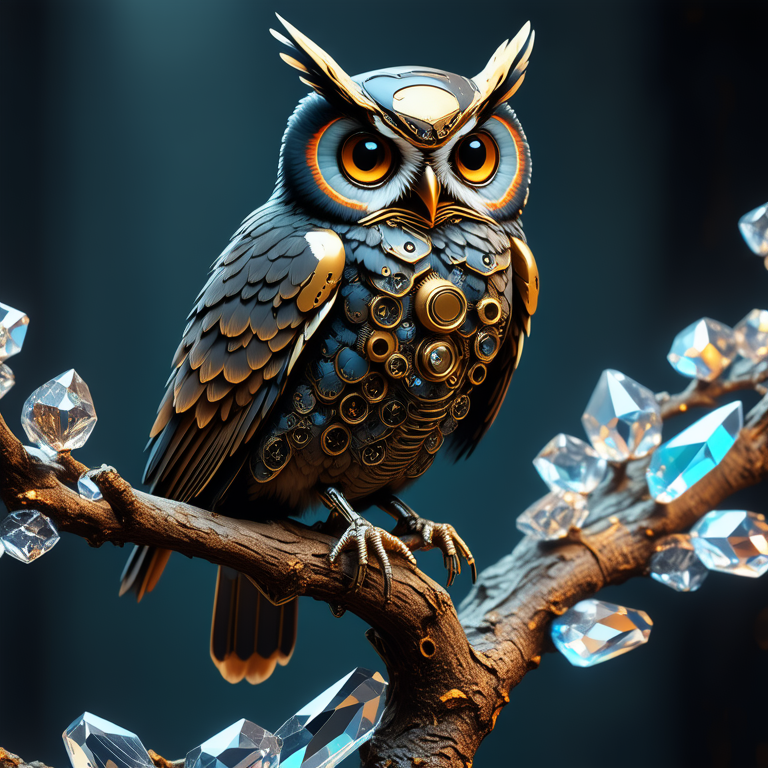

In [2]:
import torch
from diffusers import StableDiffusion3Pipeline

# 1. Load the model
pipe = StableDiffusion3Pipeline.from_pretrained(
    "stabilityai/stable-diffusion-3.5-medium",
    torch_dtype=torch.float16
)

# 2. Aggressive Memory Optimization
# NOTE: DO NOT use .to("cuda") if using sequential_cpu_offload
pipe.enable_sequential_cpu_offload()

# 3. Reduce image size
# Generating at 1024x1024 often causes OOM on T4.
# Stick to 768x768 or 512x512 for stability.
prompt = "A steampunk robotic owl perched on a crystal branch, digital art, 8k"

image = pipe(
    prompt=prompt,
    num_inference_steps=28,
    guidance_scale=7.0,
    width=768,
    height=768
).images[0]

display(image)